# PCA for data visualization

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [1]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
df  = pd.read_csv(url,
                               names = ['sepal length', 
                                                'sepal width', 
                                                'petal length', 
                                                'petal width', 
                                                'target'])

In [8]:
# Note that PCA is affected by the scale of the data so always scale before doing PCA

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)

In [13]:
# Instantiate a PCA object with n number of principal components

pca = PCA(n_components = 2)

In [15]:
principalComponents = pca.fit_transform(x)

In [17]:
principaldf = pd.DataFrame(data = principalComponents,
                                                  columns = ['pc_1', 'pc_2'])

In [19]:
finaldf = pd.concat([principaldf, df.target], axis = 1)

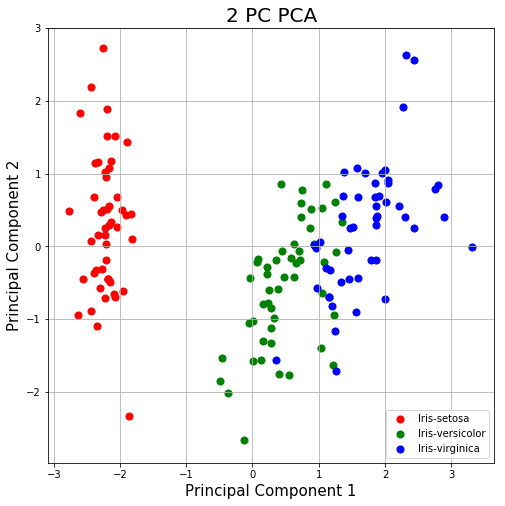

In [23]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 PC PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finaldf.target == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc_1'],
                      finaldf.loc[indicesToKeep, 'pc_2'],
                      c = color,
                      s = 50)
    
ax.legend(targets)
ax.grid()

In [24]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.